# Boundary-value Problems: second-order ODE

To solve a first order ODE, one constraint is needed (initial value problem, IVP). In the case of a second order ODE, two constraints are needed. **If the constraints are defined at different locations of the domain, then you will be dealing with a Boundary-value problem (BVP)**. Mostly when we use time derivatives we have an IVP and when we have a derivative in space we have to deal with spacial constraints and therefore BVP's. See the following examples:

$$
\frac{dp}{dt} = -p^{3/2} + 5*p_{cst}(1-e^{-t}) \text{ first order ODE -> IVP with 1 constraints }  p[0] = 1000 
$$

$$
\frac{d^2y}{dt^2} = \frac{dy}{dt} -y + \cos t =0 \text{ second order ODE -> IVP with 2 constraints }  y[0] = 2 \text{ and } \left. \frac{dy}{dt} \right|_{t=0} = 5
$$

$$
\frac{d^2T}{dx^2}-\alpha_1(T-T_s) =0 \text{ second order ODE -> BVP with 2 constraints }  T[0] = 10 \text{ and }T[-1] = 20
$$

Even for higher ODE orders, the number of constrains required corresponds to the order of the ODE. It is clear that a second order ODE can either be an IVP or a BVP. The former case is common when describing time derivatives and the latter case is common when describing space derivatives. From now on, we focus on BVP. 

## Boundary Conditions

A second order ODE BVP of the type:

$$
\frac{d^2y}{dx^2} = g(x,y,\frac{dy}{dx})
$$

with a domain solution $a<=x<=b$ and boundary conditions (or constraints) defined at $a$ and $b$ typically has two types of boundary conditions: 

 - Dirichlet boundary conditions 

$$
y(x=a) = Y_a \text{ and } y(x=b) = Y_b
$$

 - Neumann boundary conditions

$$
\left. \frac{dy}{dx} \right|_{x=a} = D_a \text{ and } \left. \frac{dy}{dx} \right|_{x=b} = D_b
$$

Of course, a combination of BC can also exist. 

Consider the following equation that describes the deformation $y$ of a beam with length $L$ clamped at $x=0$ and $x=L$:

$$
\frac{d^4y}{dx^4}=\alpha \text{ load}(x) 
$$

where $\alpha$ represents the beams material characteristics.

As it is and ODE of fourth order, it needs 4 BCs. The nature of the problem states that the **deformation** and the **slope of the deformation** at the ends is 0, thus, two Dirichlet and two Neumann BCs:  

$$
y(0)=0; \left. \frac{dy}{dx} \right|_{x=0}=0; \hspace{5mm} y(L)=0; \left. \frac{dy}{dx} \right|_{x=L}=0; 
$$

```{figure} figs/Beam.svg
:name: Beam

Illustrating the boundary conditions of a fourth order ODE that describes the deformation of a beam 
```


## Solving a BVP using Finite Differences

Just like in the initial value problem section, here the derivatives are approximated numerically following a desired method and order of accuracy. Now the domain going from $a$ to $b$ is discretized using a determined number of grid points $n$ and, thus, a number of sub-intervals $N$. There is always one more point than sub-intervals, $n=N+1$. This is the grid (see Figure below) and, if the spacing is regular, then the length of the sub-interval is $\Delta x = (b-a)/N$. 



```{figure} figs/grid.svg
:name: grid

Illustration of the grid, highlighting the two external boundary nodes with known temperatures ($T$) and the internal nodes where the temperature values must be estimated.
```

The Boundary Conditions are defined at the end points and the discretization is applied at **almost** every point. This depends on the numerical approximation. The following steps are followed to solve a BVP:

1. Discretization of the differential equation with a numerical approximation of choice
2. Parameter definition
3. Grid creation
4. Define Boundary conditions 
5. Building a system of equations according to the discretization: $Ay=b$
6. Solving the system

:::{card}
Lets visualize these steps above with an exercise:



Let's consider the following problem 2nd order differential equation BVP:

$$
\frac{d^2T}{dx^2} - \alpha(T-Ts)= 0, \hspace{5mm} x \in(0,0.1)
$$

$$
T(0)= 473 [K], \hspace{3mm} T(0.1)= 293 [K]
$$

The parameter $\alpha=166$ and your starting temperature $Ts= 293 [K]$


Use the Finite Central Difference method to approximate the above differential equation at 5 equally spaced intervals.

$$
\text{Central Difference: } f''= \frac{f(x_i-\Delta x)-2f(x_i)+f(x_i+\Delta x)}{\Delta x^2}+ \mathcal{O}(\Delta x)^2.
$$


```{admonition} Click here for the derivation of the 2nd order central finite difference method
:class: tip, dropdown

Solution:

Remember the trick: 2nd order derivative and 2nd error order (2+2=4), so expand the Taylor series until the 4th order

$$
f(x_{i+1}) = f(x_i) + \Delta x f'(x_i) + \frac{\Delta x^2}{2} f''{x_i} + \frac{\Delta x^3}{6} f'''_{x_i} + \mathcal{O}(\Delta x^4)
$$

$$
f(x_{i-1}) = f(x_i) - \Delta x f'(x_i) + \frac{\Delta x^2}{2} f''{x_i}  - \frac{\Delta x^3}{6} f'''_{x_i} + \mathcal{O}(\Delta x^4)
$$

Now, summing the two expansions (for $ x_{i+1}$ and $ x_{i-1} $):

$$
f(x_{i+1}) + f(x_{i-1}) = 2y(x_i) + \frac{\Delta x^2}{2} f''{x_i} + \mathcal{O}(\Delta x^4)
$$

Rearranging to isolate the second derivative and divide by $\Delta x^2$:

$$
 f''= \frac{f(x_i-\Delta x)-2f(x_i)+f(x_i+\Delta x)}{\Delta x^2}+ \mathcal{O}(\Delta x).
$$

```
:::

<!-- ```{admonition} Click here for a more detailed derivation of the s
:class: tip, dropdown -->

:::{card}

1. **First discretize the differential equation**

We use the Central Difference method to discretize our above differential equation

$$
 \frac{1}{\Delta x^2}(T_{i-1}-2T_{i}+T_{i+1}) - \alpha (T_i - Ts) =0
$$

:::

:::{card}

2. **Define parameters**

Our parameters are $\alpha$ and Ts

:::

:::{card}

3. **Define your grid**

We want 5 equally spaced intervals. $\Delta x = (0.1-0)/5= 0.02$ and $\Delta x^2= 0.0004$

Define the grid:
$x_0= 0, x_1= 0.02, x_2= 0.04, x_3= 0.06,x_4= 0.08, x_5= 0.1$

:::

:::{card}

4. **Define boundary conditions**

Our external nodes $x_0$ and at $x_5$ are our dirichlet boundary conditions, which are our known solutions at:

$$
T_0= 473 [K], \hspace{3mm} T_5= 293 [K]
$$

:::

:::{card}

5. **Building a System of Equations:$ \mathbf{A} \mathbf{T} = \mathbf{y} $**

We will use the central difference method to approximate the derivative at the internal nodes.

**For $i = 1$:**
The finite difference approximation for the first internal node is:

$$
\frac{1}{\Delta x^2}(T_0 - 2T_1 + T_2) - \alpha T_1 + \alpha T_s = 0
$$

Next, we multiply by $\Delta x^2$ and substitute the boundary condition for $T_0$. Notice that the only unknown solutions are $T_1$ and $T_2$
Rearranging the terms gives:

$$
-(2 + \alpha \Delta x^2) T_1 + T_2 = -\alpha T_s \Delta x^2 - T_0
$$

**For $i = 2$:**
The finite difference approximation for the second internal node is:

$$
\frac{1}{\Delta x^2}(T_1 - 2T_2 + T_3) - \alpha T_2 + \alpha T_s = 0
$$

Rearranging the terms:

$$
T_1 - (2 + \alpha \Delta x^2) T_2 + T_3 = -\alpha T_s \Delta x^2
$$

**For $i = 3$:**
The finite difference approximation for the third internal node is:

$$
\frac{1}{\Delta x^2}(T_2 - 2T_3 + T_4) - \alpha T_3 + \alpha T_s = 0
$$

Rearranging the terms:

$$
T_2 - (2 + \alpha \Delta x^2) T_3 + T_4 = -\alpha T_s \Delta x^2
$$


**For $i = 4$**

$$
\frac{1}{\Delta x^2}(T_3-2T_4+T_5) - \alpha T_4 + \alpha Ts =0
$$

Notice that now we can plug in our other bc $T_5$ and rearrange the terms:

$$
(T_3 - (2 + \alpha \Delta x^2) T_4 ) = -\alpha Ts \Delta x^2 -T_5 
$$

We can now move the equations in the Ax=y form:

$$
\begin{bmatrix}
 -(2 + \alpha \Delta x^2) & 1 & 0 & 0 \\
1 & -(2 + \alpha \Delta x^2) & 1 & 0 \\
0 & 1 & -(2 + \alpha \Delta x^2) & 1 \\
0 & 0 & 1 & -(2 + \alpha \Delta x^2)
\end{bmatrix} \begin{bmatrix}
T_1 \\
T_2 \\
T_3 \\
T_4
\end{bmatrix}
=
\begin{bmatrix}
-\alpha Ts \Delta x^2 -T_0\\
-\alpha Ts \Delta x^2 \\
-\alpha Ts \Delta x^2\\
-\alpha Ts \Delta x^2 -T_5
\end{bmatrix}
$$

:::

**Below you can see how we can put the above steps into code:**

We can now estimate the temperature T at each node.

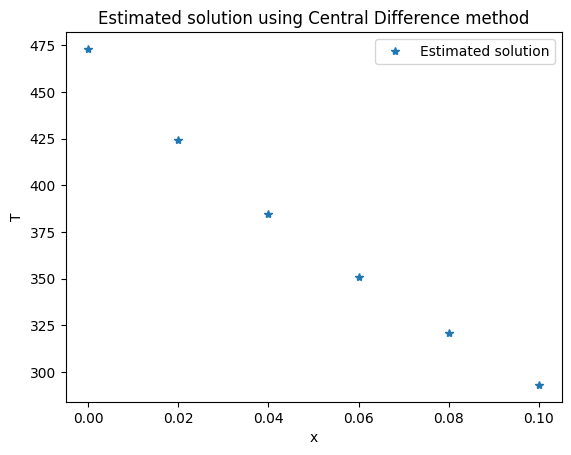

The estimated temperature at the nodes are: ['473.00', '424.46', '384.64', '350.91', '321.02', '293.00'] [K]


In [25]:
import numpy as np 
import matplotlib.pyplot as plt


dx=0.02
Ts = 293
alpha = 166
matrix_element = -(2+dx**2*alpha)
b_element = -dx**2*alpha*Ts

# grid creation
x = np.arange(0,0.1+dx,dx)
T = np.zeros(x.shape)

# boundary conditions
T[0] = 473
T[-1] = 293

# Building matrix A
A = np.zeros((len(x)-2,len(x)-2))
np.fill_diagonal(A, matrix_element)
A[np.arange(3), np.arange(1, 4)] = 1  # Upper diagonal
A[np.arange(1, 4), np.arange(3)] = 1  # Lower diagonal
b = np.array([ b_element - T[0] , b_element, b_element,  b_element - T[-1]])

# Solving the system
A_inv = np.linalg.inv(A)
T[1:-1] = A_inv @ b


plt.plot(x,T,'*',label='Estimated solution')
plt.xlabel('x')
plt.ylabel('T')
plt.title('Estimated solution using Central Difference method')
plt.legend()
plt.show()

print(f'The estimated temperature at the nodes are: {[f"{temp:.2f}" for temp in T]} [K]')



### Summary of Finite Difference methods


**First order derivative Finite Difference Methods**


$$
\text{Backward Difference: } f'= \frac{f(x_i)-f(x_{-1})}{\Delta x} + \mathcal{O}(\Delta x)
$$

$$
\text{Forward Difference: } f'= \frac{f(x_{i+1})-f(x_1)}{\Delta x}+ \mathcal{O}(\Delta x)
$$

$$
\text{Central Difference: } f'= \frac{f(x_{i+1})-f(x_{i-1})}{2\Delta x}+ \mathcal{O}(\Delta x)^2
$$

**Second order derivative Finite Difference Methods**

$$
\text{Backward Difference: }f''(x_i)=\frac{f(x_i)-2f(x_{i-1})+ f(x_{i-2})}{\Delta x^2}+ \mathcal{O}(\Delta x).
$$

$$
\text{Forward Difference: }f''(x_i)=\frac{f(x_{i+2})-2f(x_{i+1})+f(x_i)}{\Delta x^2}+ \mathcal{O}(\Delta x).
$$

$$
\text{Central Difference: } f''= \frac{f(x_{i-1})-2f(x_i)+f(x_{i+1})}{\Delta x^2}+ \mathcal{O}(\Delta x)^2.
$$


:::{card}

For if you want a bit more practice.

**Exercise**

Here is a second order derivative BCP:

$$
f''= x^2, \hspace{5mm} x \in(0,1)
$$
$$
f(0)=1, f(1)=1
$$

Divide the domain [0,1] into 5 equal intervals and apply the Central Finite Difference to estimate $f''$ at each grid node.


```{admonition} Solution
:class: tip, dropdown

Discretize differential equation:

$$
f''_i \approx \frac{1}{\Delta x^2}(f_{i-1}-2f_i+f_{1+1})
$$

Define the grid:

$\Delta x$  = (1-0)/5 = 0.2 Hence $\frac{1}{\Delta x^2} = \frac{1}{0.2^2}= 25$

$$
x_0 = 0, x_1 = 0.2, x_2= 0.4, x_3= 0.6, x_4= 0.8, x_5= 1
$$

Define BC:

$$
f_0= 1, \hspace{5mm} f_5= 1
$$

Set up a system of equations for internal nodes i= 1,...,4 :

$$
25(f_0-2f_1+f_2)= 0.2^2
$$
$$
25(f_1-2f_2+f_3)= 0.4^2
$$
$$
25(f_2-2f_3+f_4)= 0.6^2
$$
$$
25(f_3-2f_4+f_5)= 0.8^2
$$

Plugging in the bc $f_0=1$ and $f_5=1$ and moving the to the right-hand side:

$$
25(-2f_1+f_2)= 0.2^2 - 25
$$
$$
25(f_1-2f_2+f_3)= 0.4^2
$$
$$
25(f_2-2f_3+f_4)= 0.6^2
$$
$$
25(f_3-2f_4)= 0.8^2 - 25
$$

we can bring this to a system of linear equations of the form:

$$
\frac{1}{\Delta x^2}A\mathbf{f}=\mathbf{y}
$$

$$
25\begin{bmatrix}
-2 & 1 & 0 & 0 \\
1 & -2  & 1 & 0 \\
0 & 1 & -2  & 1 \\
0 & 0 & 1 & -2 
\end{bmatrix} \begin{bmatrix}
f_1 \\
f_2 \\
f_3 \\
f_4
\end{bmatrix}
=
\begin{bmatrix}
0.2^2 - 25\\
0.4^2 \\
0.6^2\\
0.8^2 - 25
\end{bmatrix}
$$

```

:::